In [189]:
import pandas as pd
# NeuralProphet 클래스 불러오기
from neuralprophet import NeuralProphet, set_log_level
from neuralprophet import set_random_seed
from sklearn.metrics import mean_squared_error, mean_absolute_error
import holidays

In [190]:
df = pd.read_csv("인천교통공사_역별일별 이용인원현황_20230630.csv", encoding='cp949')
df

,호선,통행일자,역명,구분,이용인원
0,1,2022-07-01,계양,승차,3425
1,1,2022-07-01,계양,하차,3307
2,1,2022-07-02,계양,승차,2826
3,1,2022-07-02,계양,하차,2862
4,1,2022-07-03,계양,승차,2074
...,...,...,...,...,...
49635,7,2023-06-28,석남,하차,6791
49636,7,2023-06-29,석남,승차,7061
49637,7,2023-06-29,석남,하차,6193
49638,7,2023-06-30,석남,승차,8160


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49640 entries, 0 to 49639
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선      49640 non-null  int64 
 1   통행일자    49640 non-null  object
 2   역명      49640 non-null  object
 3   구분      49640 non-null  object
 4   이용인원    49640 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.9+ MB


In [192]:
df=df[df['구분']=='하차']
df.drop(['호선','구분'], axis=1,inplace=True)
df

WARNING - (py.warnings._showwarnmsg) - C:\Users\tj-bu\AppData\Local\Temp\ipykernel_11332\990016310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['호선','구분'], axis=1,inplace=True)



,통행일자,역명,이용인원
1,2022-07-01,계양,3307
3,2022-07-02,계양,2862
5,2022-07-03,계양,2325
7,2022-07-04,계양,3309
9,2022-07-05,계양,3368
...,...,...,...
49631,2023-06-26,석남,6230
49633,2023-06-27,석남,6717
49635,2023-06-28,석남,6791
49637,2023-06-29,석남,6193


In [193]:
df = df[['통행일자', '이용인원', '역명']]
df

,통행일자,이용인원,역명
1,2022-07-01,3307,계양
3,2022-07-02,2862,계양
5,2022-07-03,2325,계양
7,2022-07-04,3309,계양
9,2022-07-05,3368,계양
...,...,...,...
49631,2023-06-26,6230,석남
49633,2023-06-27,6717,석남
49635,2023-06-28,6791,석남
49637,2023-06-29,6193,석남


In [194]:
df.columns = ['ds', 'y', 'location']
df['ds'] = pd.to_datetime(df['ds'])
df

,ds,y,location
1,2022-07-01,3307,계양
3,2022-07-02,2862,계양
5,2022-07-03,2325,계양
7,2022-07-04,3309,계양
9,2022-07-05,3368,계양
...,...,...,...
49631,2023-06-26,6230,석남
49633,2023-06-27,6717,석남
49635,2023-06-28,6791,석남
49637,2023-06-29,6193,석남


In [195]:
df1 = df[df['location']=='부평']
df1 = df1[['ds','y']]
df1

,ds,y
7301,2022-07-01,7006
7303,2022-07-02,6260
7305,2022-07-03,4382
7307,2022-07-04,6074
7309,2022-07-05,6449
...,...,...
8021,2023-06-26,5877
8023,2023-06-27,6336
8025,2023-06-28,6631
8027,2023-06-29,5628


In [196]:
# 원본 데이터프레임에서 랜덤하게 10%의 행을 선택하여 새로운 데이터프레임 생성
df1_sampled = df1.sample(frac=0.1, random_state=42)

# 선택한 행을 원본 데이터프레임에서 제거
df1_drop = df1.drop(df1_sampled.index)
df1_sampled = df1_sampled.sort_values(by='ds')

df1_sampled

,ds,y
7301,2022-07-01,7006
7319,2022-07-10,4565
7331,2022-07-16,6306
7351,2022-07-26,5962
7367,2022-08-03,5749
7379,2022-08-09,4906
7385,2022-08-12,6603
7411,2022-08-25,5844
7415,2022-08-27,6507
7445,2022-09-11,4283


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24820 entries, 1 to 49639
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        24820 non-null  datetime64[ns]
 1   y         24820 non-null  int64         
 2   location  24820 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 775.6+ KB


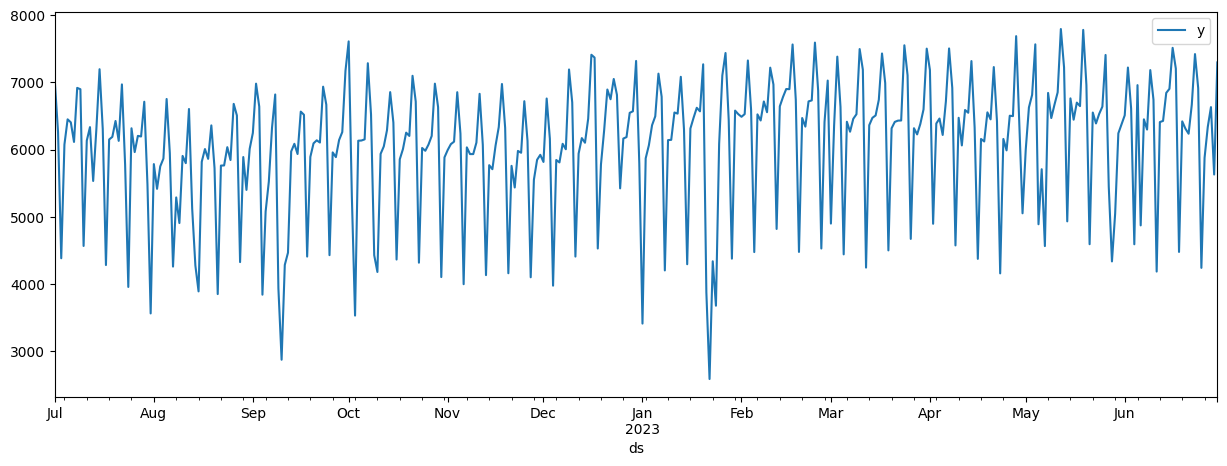

In [198]:
plt = df1.plot(x="ds", y="y", figsize=(15, 5))

In [199]:
# 오류가 아닌 경우 로깅 메시지 비활성화
set_log_level("ERROR")
set_random_seed(0)

# 기본 매개변수로 NeuralProphet 모델 생성
m = NeuralProphet(
    trend_reg=1, # 트렌드의 기울기(높을수록 기울기가 낮아짐)
    
#     n_changepoints=0,
    # Enable all seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
#     daily_seasonality=True,
#     n_lags=10,
#     n_forecasts=30
)

# # 한국의 휴일 날짜 목록을 특정 연도(예: 2022)에 맞춰 생성합니다.
# # 원본 데이터 기간 설정
# start_date = "2022-07-01"
# end_date = "2023-06-30"

# # 2022년 7월부터 2023년 6월까지의 한국 휴일 생성
# korean_holidays = holidays.Korea(years=[2022, 2023], observed=True)
# korean_holidays = [(date, name) for date, name in korean_holidays.items() if start_date <= str(date) <= end_date]

# # 휴일 날짜를 DataFrame 형태로 변환합니다.
# df_events_korea = pd.DataFrame({"event": "korean_holidays", "ds": list(korean_holidays)})


# # 한국의 공휴일 이벤트를 추가합니다.
# m.add_events("korean_holidays")

# # 원본 데이터프레임과 한국의 공휴일 이벤트 데이터프레임을 결합합니다.
# df1_drop = m.create_df_with_events(df1_drop, df_events_korea)
# # df1 = m.create_df_with_events(df1, df_events_korea)

# df1_train, df1_val = m.split_df(df1, valid_p=0.1)
print("Dataset size:", len(df1))
print("Train dataset size:", len(df1_drop))
print("Validation dataset size:", len(df1_sampled))

Dataset size: 365
Train dataset size: 329
Validation dataset size: 36


In [200]:
# 데이터셋에 모델 피팅하기 (이 과정은 시간이 걸릴 수 있습니다)
metrics = m.fit(df1_drop, validation_df=df1_sampled)
# metrics

# metrics = m.fit(df1)

Finding best initial lr:   0%|          | 0/215 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 21it [00:00, ?it/s]

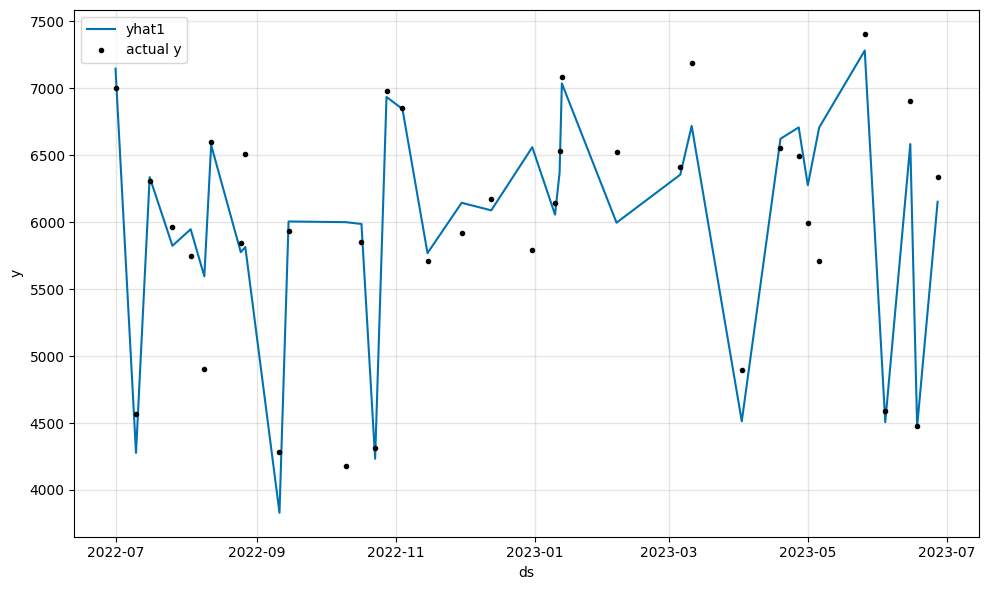

In [201]:
forecast = m.predict(df1_sampled)
# forecast = m.predict(df1)

m.set_plotting_backend("matplotlib")
m.plot(forecast)

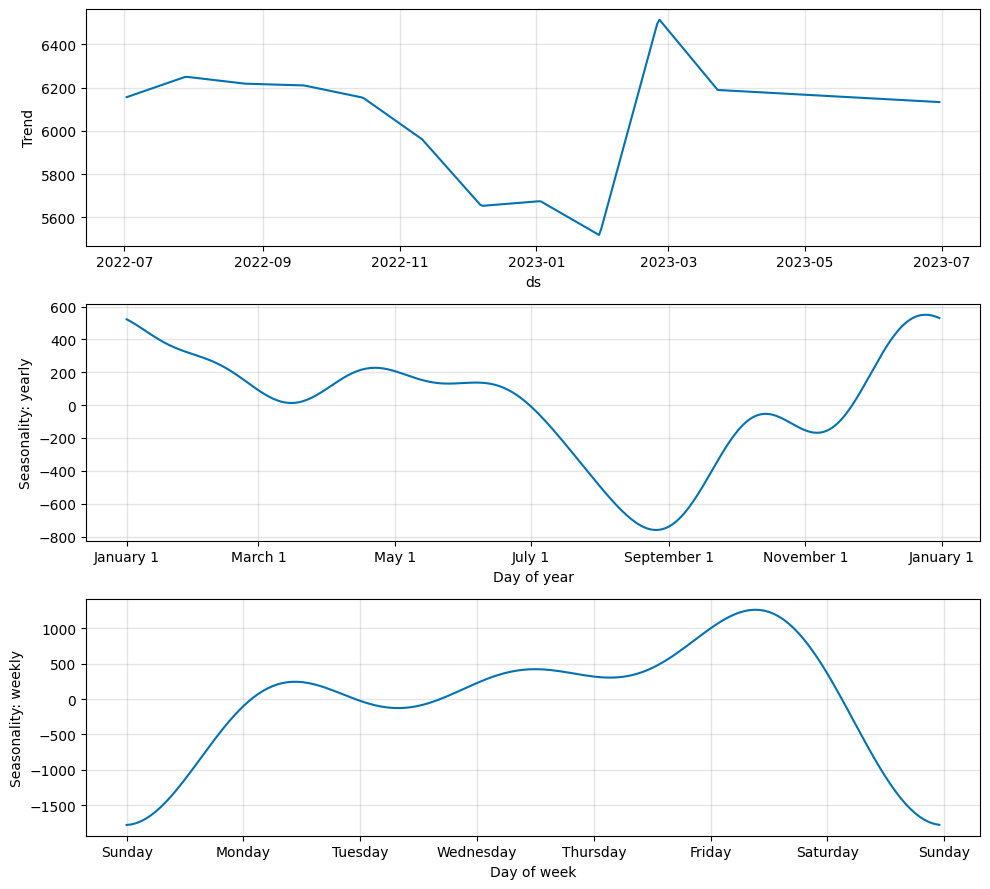

In [202]:
m.plot_parameters(components=["trend", "seasonality"])

In [203]:
# 검증 데이터에 대한 모델 성능 평가
actual = df1_sampled['y'].values
predicted = forecast['yhat1'].values  # 예측된 값의 열 이름에 따라 조정

mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

print(f"평균 제곱 오차: {mse:.2f}")
print(f"평균 절대 오차: {mae:.2f}")

평균 제곱 오차: 202922.05
평균 절대 오차: 278.63


그냥 (트렌드 주석처리 했을때)
평균 제곱 오차: 205344.48
평균 절대 오차: 282.93

Predicting: 21it [00:00, ?it/s]

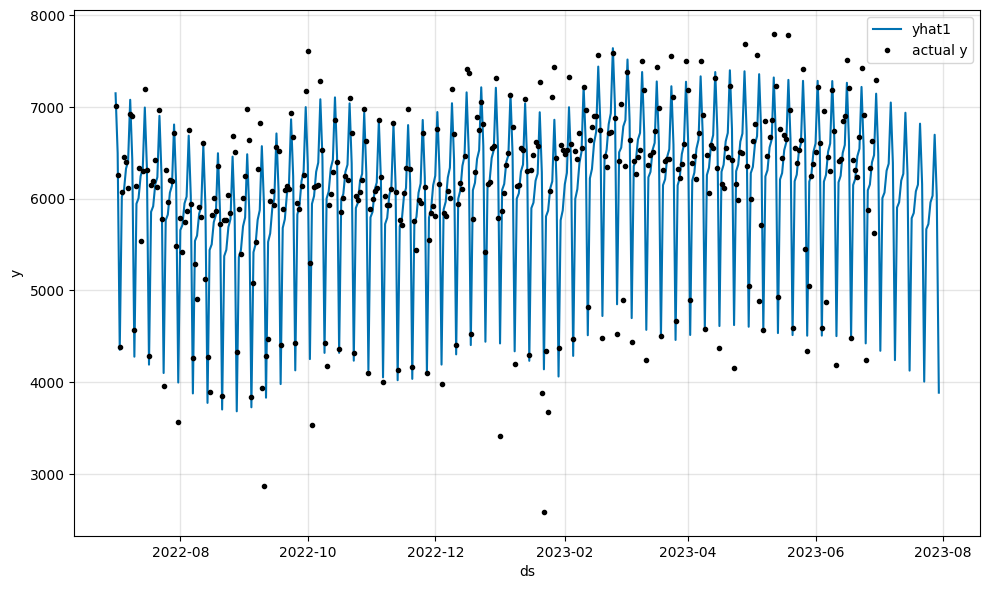

In [204]:
# 예측용으로 미래로부터 365일까지의 새로운 데이터프레임 생성, 
# n_historic_predictions는 과거 데이터도 포함됨
df_future = m.make_future_dataframe(df1, n_historic_predictions=True, periods=30)

# 미래 예측
forecast = m.predict(df_future)

# 예측 시각화
m.plot(forecast)